In [54]:
import pandas as pd
df=pd.read_csv('/Users/soniazhai/Desktop/project_UKonline_retail/online_retail_II.csv')
print(df.shape)
df.info()
df.head()

(1067371, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [55]:
df.isnull().sum()


Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [56]:
df.describe()

,Quantity,Price,Customer ID
count,1067371.00,1067371.00,824364.00
mean,9.94,4.65,15324.64
std,172.71,123.55,1697.46
min,-80995.00,-53594.36,12346.00
25%,1.00,1.25,13975.00
50%,3.00,2.10,15255.00
75%,10.00,4.15,16797.00
max,80995.00,38970.00,18287.00


In [57]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],errors='coerce')
df=df.dropna(subset=['Customer ID'])
df['Customer ID']=df['Customer ID'].astype('float').fillna(0).astype('int').astype('str')
df_clean=df

print(df_clean.shape)
print(df_clean.info)

(824364, 8)
<bound method DataFrame.info of         Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price Customer

In [58]:
df_clean.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [71]:
df_clean['InvoiceMonth']=df_clean['InvoiceDate'].dt.to_period('M')
df_clean['Sales']=df_clean['Quantity']*df_clean['Price']
df_clean.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth,Sales,Return
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12,83.40,False
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12,81.00,False
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12,81.00,False
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12,100.80,False
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12,30.00,False


In [74]:
Monthly_Sale=df_clean.groupby('InvoiceMonth').agg(Sales=('Sales','sum'),Quantity=('Quantity','sum'),num_unique_cus=('Customer ID','nunique'),num_order=('Invoice','nunique')).reset_index()

Monthly_Sale['sales_per_order']=(Monthly_Sale['Sales']/Monthly_Sale['num_order']).round(2)
Monthly_Sale['InvoiceMonth']=Monthly_Sale['InvoiceMonth'].dt.to_timestamp()
Monthly_Sale.head()
print(Monthly_Sale['InvoiceMonth'].min())
print(Monthly_Sale['InvoiceMonth'].max())

2009-12-01 00:00:00
2011-12-01 00:00:00


Monthly Sales Trends

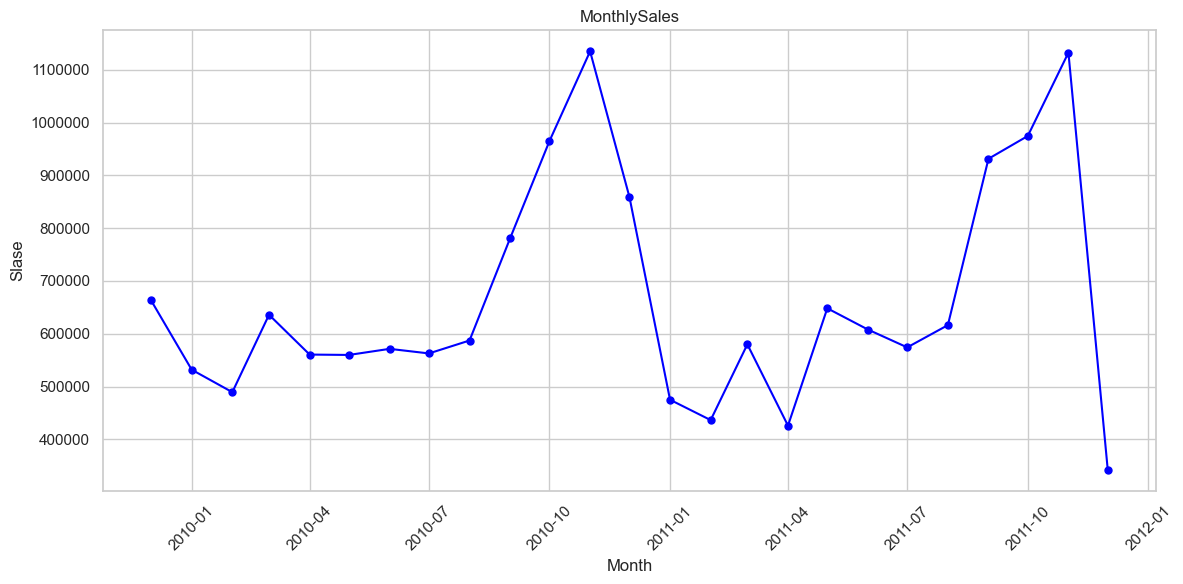

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(Monthly_Sale['InvoiceMonth'],Monthly_Sale['Sales'],color='blue',marker='o',linestyle='-',markersize=5)
plt.ticklabel_format(style='plain', axis='y')
plt.title('MonthlySales')
plt.xlabel('Month')
plt.ylabel('Slase')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Sales Top 5 Per Month

In [62]:
produc_monthly_sales=df_clean.groupby(['InvoiceMonth','Description']).agg(total_quantity=('Quantity','sum')).reset_index()
produc_monthly_sales['Rank']=produc_monthly_sales.groupby('InvoiceMonth')['total_quantity'].rank(method='first',ascending=False).astype(int)
produc_monthly_sales=produc_monthly_sales[produc_monthly_sales['Rank']<=5]
produc_monthly_sales=produc_monthly_sales.sort_values(['InvoiceMonth','Rank'],ascending=[True,True])
produc_monthly_sales.head(10)


,InvoiceMonth,Description,total_quantity,Rank
2625,2009-12,WHITE HANGING HEART T-LIGHT HOLDER,6204,1
1565,2009-12,PACK OF 12 RED SPOTTY TISSUES,5311,2
1566,2009-12,PACK OF 12 SKULL TISSUES,5232,3
1567,2009-12,PACK OF 12 WOODLAND TISSUES,4839,4
1575,2009-12,PACK OF 72 RETRO SPOT CAKE CASES,4708,5
3806,2010-01,JAZZ HEARTS MEMO PAD,9489,1
3805,2010-01,JAZZ HEARTS MAGNETIC MEMO PAD,7022,2
4314,2010-01,POP-ART FLUORESCENT PENS,6144,3
2959,2010-01,BLACK AND WHITE PAISLEY FLOWER MUG,6029,4
5043,2010-01,WHITE HANGING HEART T-LIGHT HOLDER,5380,5


Sales Top 10 Per Country Except The UK

In [63]:
pd.set_option('display.float_format', '{:.2f}'.format)
sales_of_country=df_clean.groupby('Country')['Sales'].sum().reset_index()
sales_of_country=sales_of_country.sort_values('Sales',ascending=False)
sales_of_country=sales_of_country[sales_of_country['Country']!='United Kingdom']
sales_of_country.head()

,Country,Sales
10,EIRE,578501.63
24,Netherlands,548524.95
14,Germany,417988.56
13,France,326504.67
0,Australia,167129.07


        Country     Sales
10         EIRE 578501.63
24  Netherlands 548524.95
14      Germany 417988.56
13       France 326504.67
0     Australia 167129.07
34  Switzerland  99082.81
32        Spain  91859.48
33       Sweden  87455.42
9       Denmark  65741.09
3       Belgium  63574.49


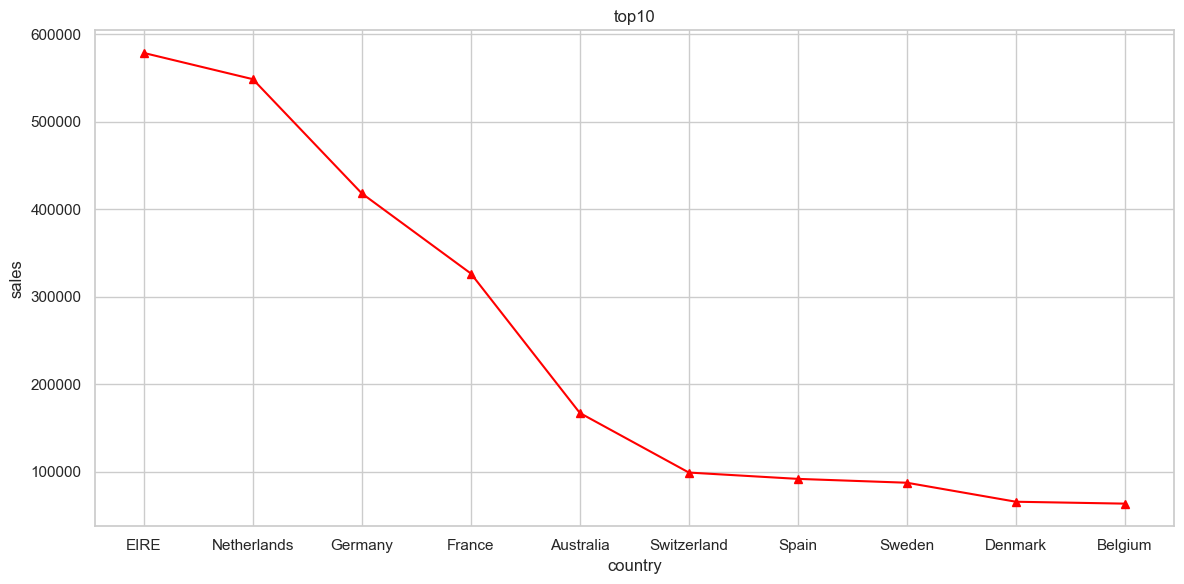

In [64]:
top10=sales_of_country.head(10)
plt.figure(figsize=(12,6))
plt.title('top10')
plt.plot(top10['Country'],top10['Sales'],color='red',marker='^',linestyle='-',markersize=6)
plt.xlabel('country')
plt.ylabel('sales')
plt.grid(True)
plt.tight_layout()
print(top10)

Rate of Return

In [65]:
df_clean['Return']=df_clean['Invoice'].str.startswith('C')
total_invoice=df_clean['Invoice'].nunique()

num_return=df_clean[df_clean['Return']]['Invoice'].nunique()

rate_return=round(100*(num_return/total_invoice),2)
print(f"{rate_return}%")

df_clean.head()

17.61%


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth,Sales,Return
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12,83.40,False
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12,81.00,False
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12,81.00,False
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12,100.80,False
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12,30.00,False


Top 10 of Return Item

In [66]:
return_item=df_clean[df_clean['Return']]
top_return=return_item.groupby('Description').agg(total_return=('Quantity','sum')).reset_index().sort_values('total_return',ascending=False).tail(10)
top_return['total_return']=top_return['total_return'].abs()


top_return.head()


,Description,total_return
2717,TEATIME PEN CASE & PENS,4632
1643,MULTICOLOUR SPRING FLOWER MUG,4996
269,BLACK SILVER FLOWER T-LIGHT HOLDER,5040
1972,POP ART PEN CASE & PENS,5184
1650,Manual,5311


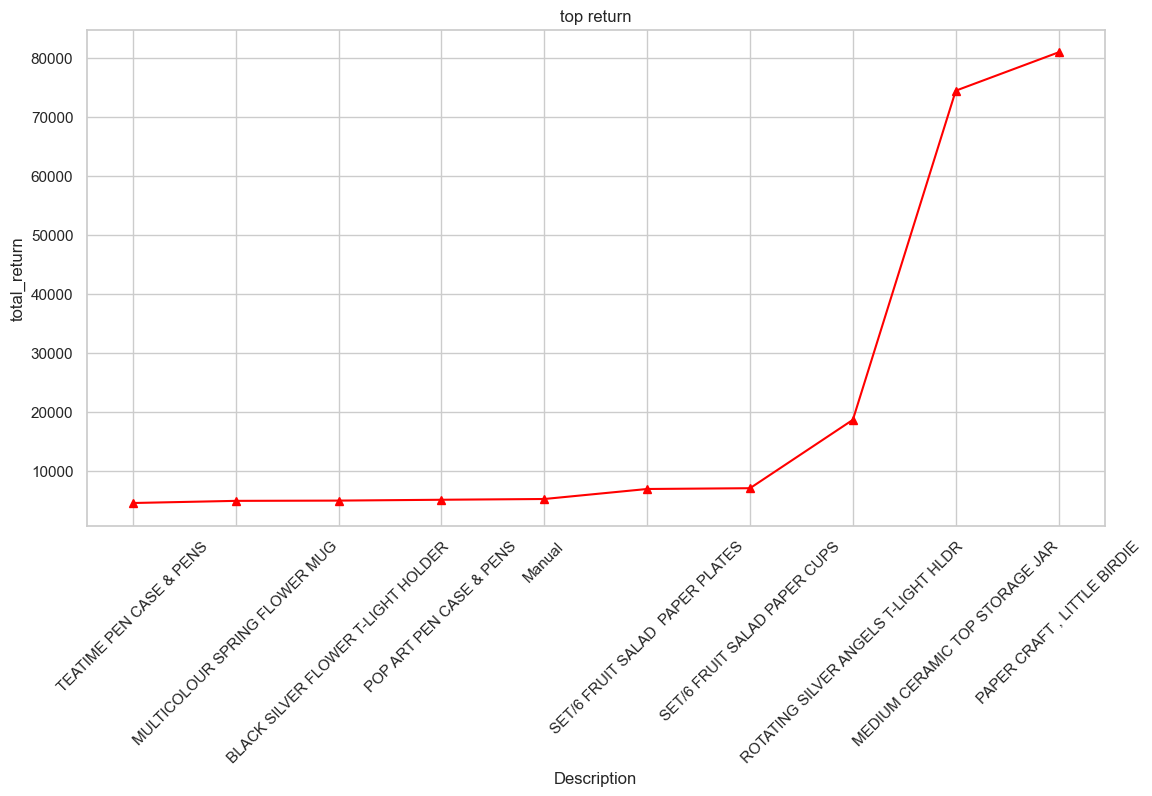

In [67]:
plt.figure(figsize=(12,6))
plt.plot(top_return['Description'],top_return['total_return'],color='red',marker='^',linestyle='-')
plt.title('top return')
plt.xlabel('Description')
plt.ylabel('total_return')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

Top 10 Purchased Customer

/var/folders/5q/xm21vtw557s3pdgszr6g4_380000gn/T/ipykernel_34688/805747117.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sale',y='Customer ID',data=customer_summary,palette='Greens_r')


Text(0.5, 1.0, 'Top 10 Purchased Customer')

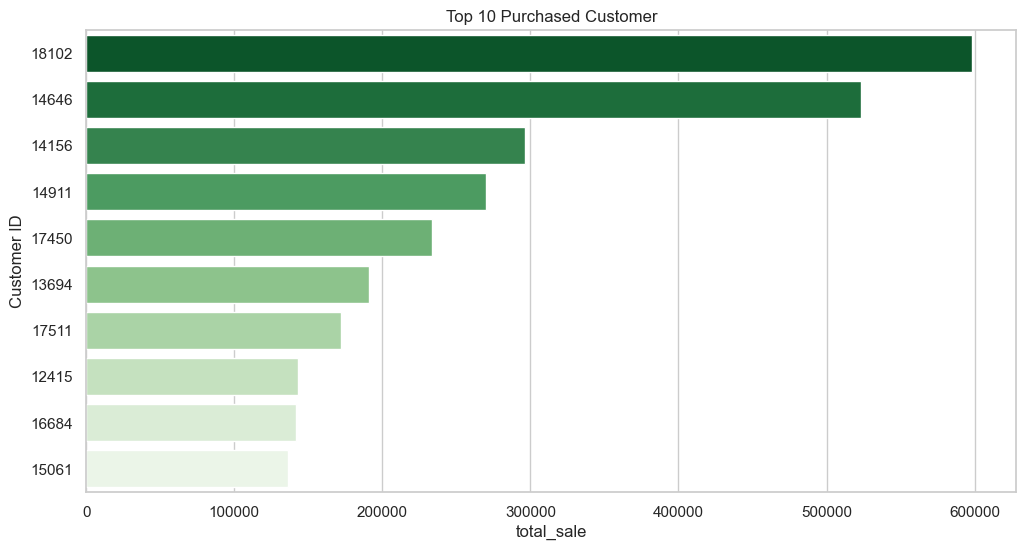

In [68]:
import seaborn as sns
customer_summary=df_clean.groupby('Customer ID').agg(total_sale=('Sales','sum'),sale_count=('Invoice','nunique')).reset_index()
customer_summary=customer_summary.sort_values('total_sale',ascending=False).head(10)
customer_summary.head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='total_sale',y='Customer ID',data=customer_summary,palette='Greens_r')
plt.title('Top 10 Purchased Customer')

Rate of Repeat

In [69]:
repeat_customer=customer_summary[customer_summary['sale_count']>1]
onetime_customer=customer_summary[customer_summary['sale_count']==1]

rate_repeat=100*len(repeat_customer)/customer_summary.shape[0]
print(f"{rate_repeat}%")

100.0%


New Customer Per Month

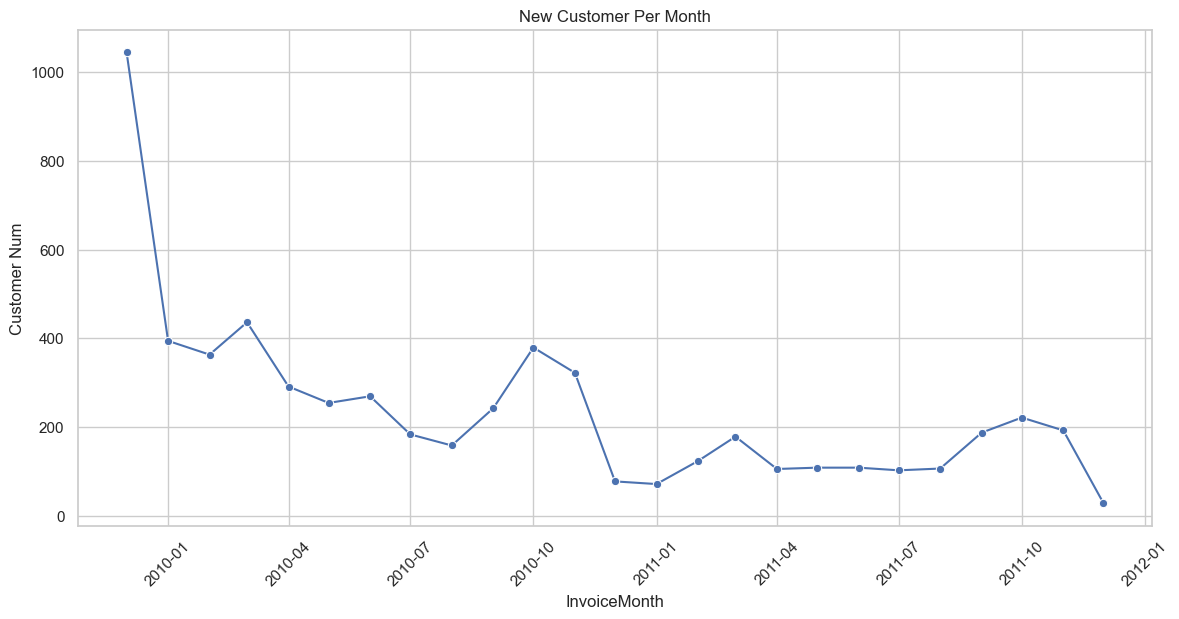

,InvoiceMonth,Customer Num
0,2009-12-01,1045
1,2010-01-01,394
2,2010-02-01,363
3,2010-03-01,436
4,2010-04-01,291


In [70]:
df_clean['InvoiceMonth']=df_clean['InvoiceDate'].dt.to_period('M').dt.to_timestamp()
First_month=df_clean.groupby('Customer ID')['InvoiceMonth'].min().reset_index()
customer_num_permonth=First_month.groupby('InvoiceMonth')['Customer ID'].nunique().reset_index(name='Customer Num')

plt.figure(figsize=(12,6))
sns.lineplot(x='InvoiceMonth',y='Customer Num',data=customer_num_permonth,marker='o')
plt.title('New Customer Per Month')
plt.tight_layout()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
customer_num_permonth.head()